In [71]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.stats import shapiro, kstest, probplot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot

### Data Load

In [72]:
# Open the dataset
df_grade = pd.read_csv('./datasets/grade_test.csv')

In [73]:
# Check dataset structure
df_grade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   study_hours  101 non-null    float64
 1   grade_test   101 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 1.7 KB


In [74]:
# Check the first 10 rows
print(df_grade.head(10))

   study_hours  grade_test
0          1.1          30
1          2.0          55
2          2.5          60
3          3.6          75
4          4.2          85
5          5.0         100
6          5.5         115
7          6.1         120
8          6.5         130
9          7.2         145


In [75]:
# Check the last 10 rows
print(df_grade.tail(10))

     study_hours  grade_test
91          44.9         750
92          45.1         755
93          45.3         760
94          45.5         765
95          45.7         770
96          46.0         780
97          46.2         785
98          46.4         790
99          46.6         795
100         46.9         800


### EDA

In [76]:
# Check the dataset statistics
df_grade.describe()

,study_hours,grade_test
count,101.000000,101.000000
mean,28.604950,455.000000
std,14.116128,221.385411
min,1.100000,30.000000
25%,16.500000,270.000000
50%,30.900000,465.000000
75%,41.800000,655.000000
max,46.900000,800.000000


<Axes: xlabel='study_hours', ylabel='grade_test'>

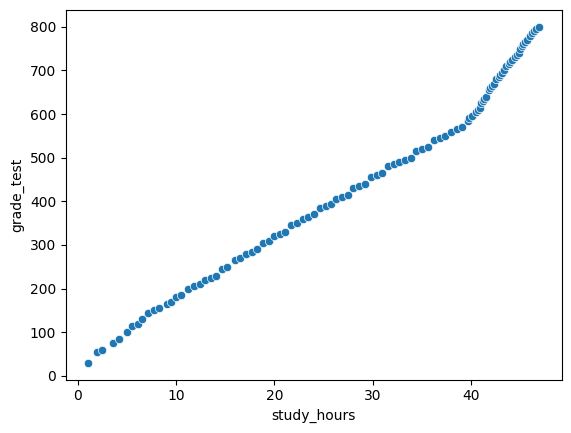

In [77]:
# Dispersion Plot
# X = study_hours
# Y = grade_test
sns.scatterplot(x='study_hours', y='grade_test', data=df_grade)

<Axes: ylabel='study_hours'>

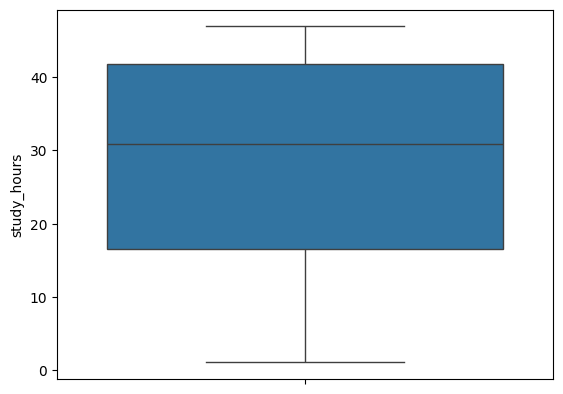

In [78]:
# Verify Outliers for study_hours
# Plot BoxPlot
sns.boxplot(df_grade, y='study_hours')

<Axes: ylabel='grade_test'>

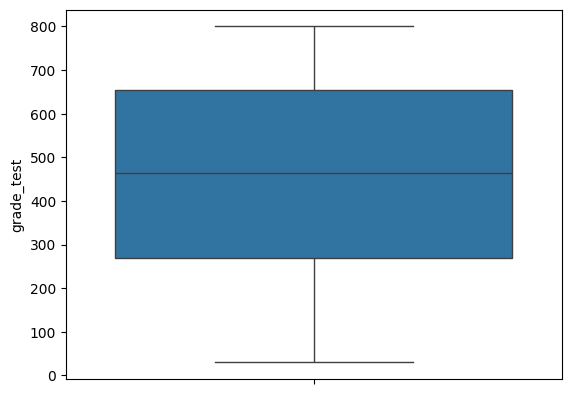

In [79]:
# Verify Outliers for grade_test
# Plot BoxPlot
sns.boxplot(df_grade, y='grade_test')

<Axes: >

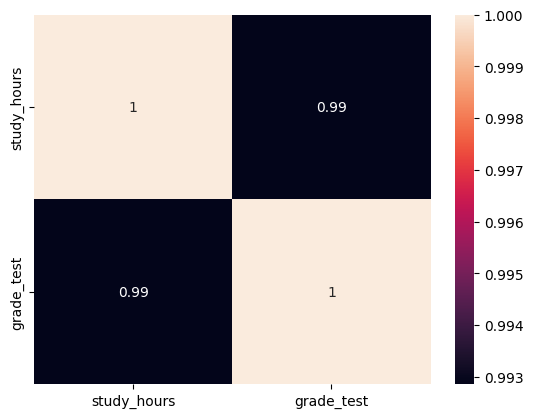

In [80]:
# Check the correlation between study_hours and grade_test - Pearson
sns.heatmap(df_grade.corr('pearson'), annot=True)


<Axes: >

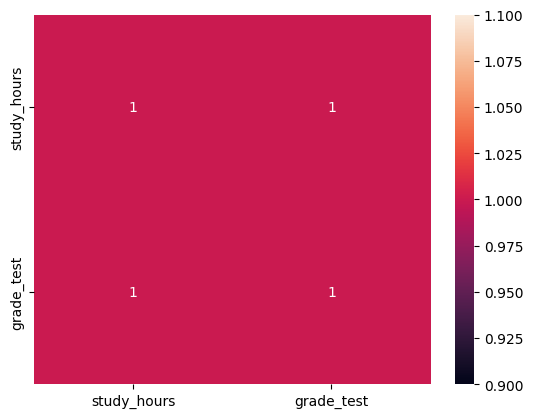

In [81]:
# Check the correlation between study_hours and grade_test - Spearman
sns.heatmap(df_grade.corr('spearman'), annot=True)

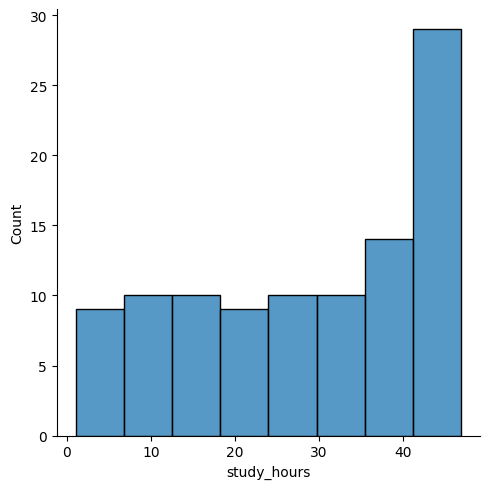

In [82]:
# Variable Histogram
sns.displot(df_grade, x='study_hours')

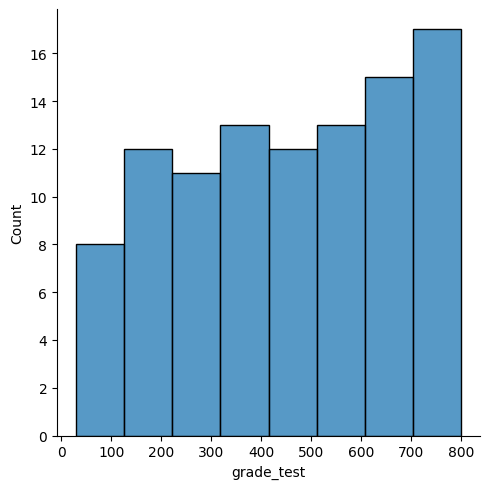

In [83]:
# Variable Histogram
sns.displot(df_grade, x='grade_test')

### Train Model

In [84]:
# Divide the dataset into training and test
# Reshape the data
X = df_grade['study_hours'].values.reshape(-1, 1)
y = df_grade['grade_test'].values.reshape(-1, 1)

# Split the dataset into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

In [85]:
# Instantiate the Linear Regression Model
reg_model = LinearRegression()

In [86]:
# Train the model
reg_model.fit(X_train, y_train)

LinearRegression()

In [87]:
# Print the line equation
# y = ax + b
print(f'Coefficient: {reg_model.coef_}')
print(f'Intercept: {reg_model.intercept_}')
print("The line equation is: y = {:4f}x + {:4f}".format(reg_model.coef_[0][0], reg_model.intercept_[0]))

Coefficient: [[15.64261854]]
Intercept: [8.47660078]
The line equation is: y = 15.642619x + 8.476601


### Validate the Model - Metrics

In [88]:
# Predict the values based on the test dataset
y_pred = reg_model.predict(X_test)

In [89]:
# Calculate the R2 (R-Squared)
# R2 represents the proportion of the variance for the dependent variable that's explained by the independent variable
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, root_mean_squared_error
r2_score(y_test, y_pred)

0.9828400452912442

In [90]:
# Calculate the Mean Absolute Error (MAE)
# MAE represents the average of the absolute errors between the predicted values and the actual values
# MAE is less sensitive to outliers
mean_absolute_error(y_test, y_pred)

22.957470277134636

In [91]:
# Calculate the Mean Squared Error (MSE)
# MSE represents the average of the squared errors between the predicted values and the actual values
# MSE is more sensitive to outliers
mean_squared_error(y_test, y_pred)

766.9972992416428

In [92]:
# Calculate the Root Mean Squared Error (RMSE)
# RMSE represents the square root of the average of the squared errors between the predicted values and the actual values
# RMSE = sqrt(MSE)
root_mean_squared_error(y_test, y_pred)

27.694716088843425

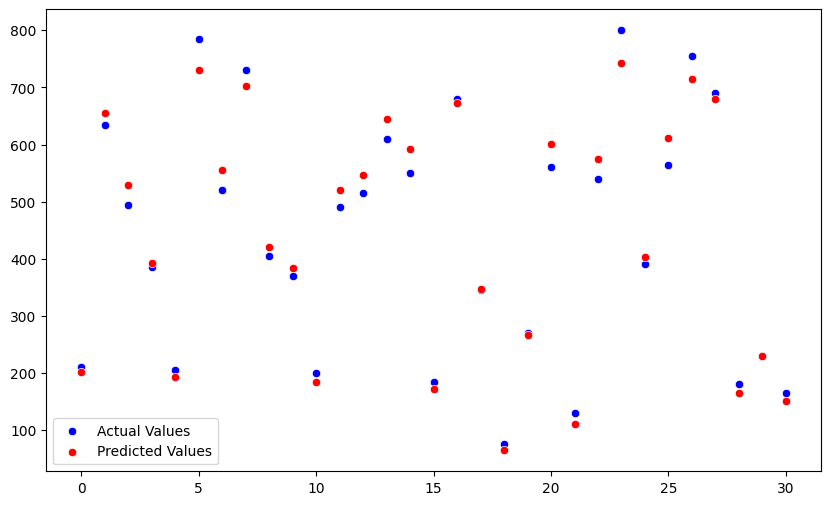

In [93]:
# Graphical Analysis
x_axis = range(len(y_test))
plt.figure(figsize=(10,6))

sns.scatterplot(x=x_axis, y=y_test.reshape(-1), color='blue', label='Actual Values')
sns.scatterplot(x=x_axis, y=y_pred.reshape(-1), color='red', label='Predicted Values')
plt.legend()
plt.show()

### Residual Analysis

In [94]:
# Calculate the residuals
residuals = y_test - y_pred

In [95]:
# Calculate the standard residuals (standardization)
# For each residual, subtract the mean and divide by the standard deviation
# standard_residuals = (residuals - residuals.mean()) / residuals.std()
from scipy.stats import zscore
standard_residuals = zscore(residuals)

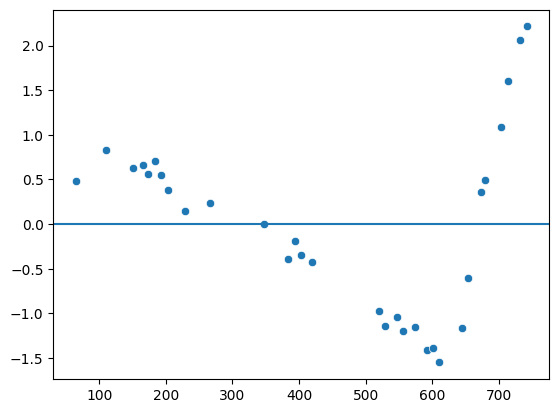

In [96]:
# Check the linearity of the model:
# If the residuals are between -2 and 2, the model is linear

# Check the homoscedasticity of the model:
# If the residuals are constant, the model is homoscedastic

sns.scatterplot(x=y_pred.reshape(-1), y=standard_residuals.reshape(-1))
plt.axhline(y=0)

Text(0, 0.5, 'Residuals')

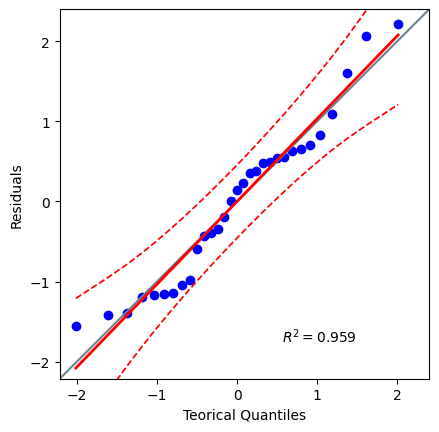

In [97]:
# Verify the normality of the residuals
# QQ (Quantile-Quantile) Plot
import pingouin as pg
pg.qqplot(residuals, dist='norm', confidence=0.95)
plt.xlabel('Teorical Quantiles')
plt.ylabel('Residuals')

In [98]:
# Normality Test
# Shapiro-Wilk Test
# H0: The data is normally distributed
# H1: The data is not normally distributed
# If p-value < 0.05, reject H0, else, we dont reject H0
stat_shapiro, p_value_shapiro = shapiro(residuals.reshape(-1))
print(f'Statistics: {stat_shapiro}, p-value: {p_value_shapiro}')

Statistics: 0.9500532226161753, p-value: 0.1566381785030444


In [99]:
# Normality Test
# Kolmogorov-Smirnov Test
# H0: The data is normally distributed
# H1: The data is not normally distributed
# If p-value < 0.05, reject H0, else, we dont reject H0
stat_ks, p_value_ks = kstest(residuals.reshape(-1), 'norm')
print(f'Statistics: {stat_ks}, p-value: {p_value_ks}')

Statistics: 0.4835580845051284, p-value: 3.3953689958140517e-07


### Model Predictions

In [100]:
# Based on someone that has studied 30.4 hours, what is the expected grade?
reg_model.predict([[30.4]])

array([[484.01220436]])

In [101]:
# How many hours are necessary to achieve a grade of 600?
# y = ax + b
# y - b = ax
# (y - b) / a = x
# x = (y - b) / a
(600 - reg_model.intercept_[0]) / reg_model.coef_[0][0]

37.81485802710669

### Save model for future executions

In [102]:
import joblib
joblib.dump(reg_model, './regression_model.pkl')


['./regression_model.pkl']